In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset = pd.read_csv('Documents/Hands-On-Artificial-Intelligence-for-Cybersecurity-master/Chapter05/datasets/network-logs.csv')

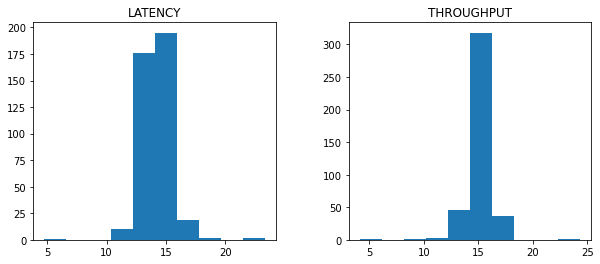

In [3]:
hist_dist = dataset[['LATENCY', 'THROUGHPUT']].hist(grid=False, figsize=(10, 4))

In [4]:
data = dataset[['LATENCY', 'THROUGHPUT']].values

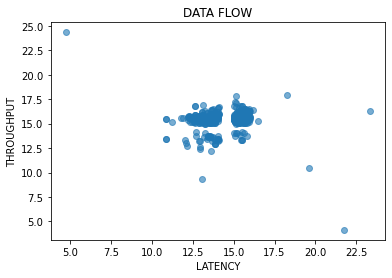

In [5]:
plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
plt.xlabel('LATENCY')
plt.ylabel('THROUGHPUT')
plt.title('DATA FLOW')
plt.show()

In [6]:
from gaussian_anomaly_detection import GaussianAnomalyDetection

In [7]:
gaussian_anomaly_detection = GaussianAnomalyDetection(data)

In [8]:
print('mu param estimation: ')
print(gaussian_anomaly_detection.mu_param)
print('\n')
print('sigma squared estimation: ')
print(gaussian_anomaly_detection.sigma_squared)

mu param estimation: 
[14.42070163 15.39209133]


sigma squared estimation: 
[2.09674794 1.37224807]


In [9]:
targets = dataset['ANOMALY'].values.reshape((data.shape[0], 1))

In [10]:
probs = gaussian_anomaly_detection.multivariate_gaussian(data)

In [11]:
(threshold, F1, precision_, recall_, f1_) = gaussian_anomaly_detection.select_threshold(targets, probs)
 
print('threshold estimation: ')
print(threshold)

threshold estimation: 
0.00027176836728971885


In [12]:
outliers = np.where(probs < threshold)[0]

Text(0.5, 1.0, 'DATA FLOW')

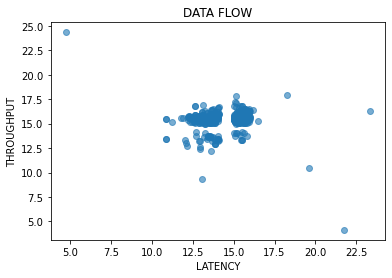

In [13]:
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label='Dataset')
plt.xlabel('LATENCY')
plt.ylabel('THROUGHPUT')
plt.title('DATA FLOW')

[]

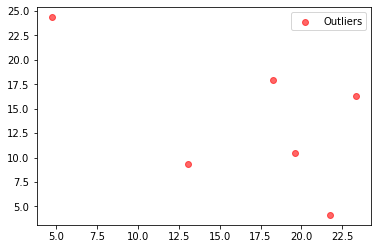

In [14]:
plt.scatter(data[outliers, 0], data[outliers, 1], alpha=0.6, c='red', label='Outliers')
# Display plots
plt.legend()
plt.plot()

In [15]:
print('F1 score: ', F1)

F1 score:  0.6666666666666666


In [16]:
from sklearn.metrics import roc_curve
FPR, TPR, OPC = roc_curve(targets, probs)

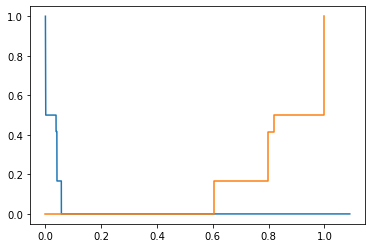

In [17]:
# Plotting Sensitivity
plt.plot(OPC, TPR)
 
# Plotting ROC curve
plt.plot(FPR, TPR)